<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#ggraph" data-toc-modified-id="ggraph-5">ggraph</a></span></li><li><span><a href="#Covid---incidence-matrix" data-toc-modified-id="Covid---incidence-matrix-6">Covid - incidence matrix</a></span></li><li><span><a href="#Covid---adjacency-matrix" data-toc-modified-id="Covid---adjacency-matrix-7">Covid - adjacency matrix</a></span><ul class="toc-item"><li><span><a href="#community-detection" data-toc-modified-id="community-detection-7.1">community detection</a></span></li></ul></li><li><span><a href="#Ped---adjacency-matrix" data-toc-modified-id="Ped---adjacency-matrix-8">Ped - adjacency matrix</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#heatmap" data-toc-modified-id="heatmap-8.0.1">heatmap</a></span></li><li><span><a href="#Graph" data-toc-modified-id="Graph-8.0.2">Graph</a></span></li></ul></li></ul></li></ul></div>

# Dependencies

In [1]:
pacman::p_load(igraph, graphlayouts, ggraph, ggforce, dplyr)

# Functions

In [584]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"

gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [4]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/"

# Main

In [5]:
load(file = paste0(datapath, "capTCRseq/gliph_int_covid_tcr.RData"))

In [7]:
gliphoutput <- read.csv(paste0(h4hpath,'/GLIPH/int_covid_tcr_cluster.csv'), header = T)

In [8]:
dim(gliphoutput)

[1] 301942     29

In [9]:
head(gliph_int_covid_tcr)

,CDR3b,TRBV,TRBJ,CDR3a,subject:condition,count,clonefraction,subject,file,index
,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,CAIRDPEQGITDTQYF,TRBV10-3,TRBJ2-3,NA,CHP_315:1,24,0.025369979,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,1
2,CAIRGTGADQPQHF,TRBV10-3,TRBJ1-5,NA,CHP_315:2,21,0.022198732,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,2
3,CAISGVWGGDTQYF,TRBV10-3,TRBJ2-3,NA,CHP_315:3,12,0.012684989,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,3
4,CASRLAGTGSPLHF,TRBV6-1,TRBJ1-6,NA,CHP_315:4,2,0.002114165,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,4
5,CASSDPQGTEAFF,TRBV6-2,TRBJ1-1,NA,CHP_315:5,21,0.022198732,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,5
6,CASSEEPGTSGYNEQFF,TRBV2,TRBJ2-1,NA,CHP_315:6,6,0.006342495,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,6


map back to the original data

In [10]:
gliph_all <- merge(gliph_int_covid_tcr, gliphoutput, 
                   by.x = "subject:condition", by.y = "Sample", all = T)

In [11]:
dim(gliphoutput)

[1] 301942     29

In [12]:
#remove HLA cols they are empty
HLAcol <- colnames(gliph_all)[!grepl("HLA", colnames(gliph_all))]
gliph_all <- gliph_all[, ..HLAcol]

In [71]:
colnames(gliph_all)

[1] "subject:condition"  "CDR3b"              "TRBV"              
 [4] "TRBJ"               "CDR3a"              "count"             
 [7] "clonefraction"      "subject"            "file"              
[10] "index.x"            "index.y"            "pattern"           
[13] "Fisher_score"       "number_subject"     "number_unique_cdr3"
[16] "final_score"        "hla_score"          "vb_score"          
[19] "expansion_score"    "length_score"       "cluster_size_score"
[22] "type"               "TcRb"               "V"                 
[25] "J"                  "TcRa"               "Freq"

In [14]:
save(gliph_all, file = paste0(datapath, "GLIPH/gliph_all.RData"))

# ggraph

In [6]:
load(file = paste0(datapath, "GLIPH/gliph_all.RData"))

In [7]:
gliph_rm_na <- gliph_all[ !is.na(gliph_all$pattern),]

In [8]:
dim(gliph_all)

[1] 405687     27

In [9]:
dim(gliph_rm_na)

[1] 301942     27

In [10]:
gliph_rm_na_singlerm <- gliph_rm_na[ gliph_rm_na$pattern != "single",]

# Covid - incidence matrix

In [10]:
covid <- gliph_rm_na_singlerm[ grepl("COVID", gliph_rm_na_singlerm$file),]

In [11]:
covid$sampleID <- gsub(":.*", "", covid$`subject:condition`)

In [12]:
head(covid)

,subject:condition,CDR3b,TRBV,TRBJ,CDR3a,count,clonefraction,subject,file,index.x,⋯,expansion_score,length_score,cluster_size_score,type,TcRb,V,J,TcRa,Freq,sampleID
,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<chr>
128049,eAM13:101144,CASSSLDRSYNEQFF,TRBV27-01,TRBJ02-01,NA,1,1,eAM13,COVID_specific_TCRB.tsv,101144,⋯,1.00,0.001,0.0290,global-SS%DRSYNE,CASSSLDRSYNEQFF,TRBV27-01,TRBJ02-01,NA,1,eAM13
128050,eAM13:101144,CASSSLDRSYNEQFF,TRBV27-01,TRBJ02-01,NA,1,1,eAM13,COVID_specific_TCRB.tsv,101144,⋯,1.00,0.001,0.0290,global-SSLDR%YNE,CASSSLDRSYNEQFF,TRBV27-01,TRBJ02-01,NA,1,eAM13
128055,eAM13:106112,CASSTGFTGEQYF,TRBV27-01,TRBJ02-07,NA,1,1,eAM13,COVID_specific_TCRB.tsv,106112,⋯,0.20,0.001,0.0290,global-S%GFTGE,CASSTGFTGEQYF,TRBV27-01,TRBJ02-07,NA,1,eAM13
128056,eAM13:106112,CASSTGFTGEQYF,TRBV27-01,TRBJ02-07,NA,1,1,eAM13,COVID_specific_TCRB.tsv,106112,⋯,0.06,0.001,0.0023,global-STG%TGE,CASSTGFTGEQYF,TRBV27-01,TRBJ02-07,NA,1,eAM13
128057,eAM13:108332,CASSVAGARNSPLHF,TRBV09-01,TRBJ01-06,NA,1,1,eAM13,COVID_specific_TCRB.tsv,108332,⋯,1.00,0.001,0.0290,global-SVAGA%NSP,CASSVAGARNSPLHF,TRBV09-01,TRBJ01-06,NA,1,eAM13
128058,eAM13:110597,CASSVGVGSTDTQYF,TRBV07-08,TRBJ02-03,NA,1,1,eAM13,COVID_specific_TCRB.tsv,110597,⋯,0.31,0.001,0.0015,global-S%GVGSTDT,CASSVGVGSTDTQYF,TRBV07-08,TRBJ02-03,NA,1,eAM13


In [13]:
dim(covid)

[1] 207309     28

In [14]:
# number of pt
covid <- covid[ covid$number_subject > 1,]

In [15]:
dim(covid)

[1] 200559     28

In [16]:
# number of cdr3
covid <- covid[ covid$number_unique_cdr3 > 5,]

In [17]:
dim(covid)

[1] 52303    28

In [18]:
# fisher threshold
covid <- covid[ covid$Fisher_score < 0.0001,]

In [19]:
dim(covid)

[1] 8303   28

In [20]:
covid_meta <- read.csv(file = "~/Downloads/ImmuneCODE-MIRA-Release002.1/subject-metadata.csv")

In [21]:
head(covid_meta)

,Experiment,Subject,Cell.Type,Target.Type,Cohort,Age,Gender,Race,HLA.A,HLA.A.1,⋯,DQB1,DQB1.1,DRB1,DRB1.1,DRB3,DRB3.1,DRB4,DRB4.1,DRB5,DRB5.1
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,eAM13,844,PBMC,C19_cI,COVID-19-Convalescent,34,F,White,A*02:01:01,A*02:05:01,⋯,DQB1*02:01:01,DQB1*03:01:01,DRB1*03:01:01,DRB1*13:05:01,DRB3*01:01:02,DRB3*02:02:01,,,,
2,eAM23,5422,PBMC,C19_cI,COVID-19-Convalescent,48,M,N/A,A*11:01:01,A*24:02:01,⋯,DQB1*03:02:01,DQB1*06:01:01,DRB1*04:06:01,DRB1*15:02:01,DRB4*01:03:01,DRB5*01:02,,,,
3,eAV100,1995,PBMC,C19_cII,COVID-19-Convalescent,29,F,N/A,A*02:01:01,A*68:01:02,⋯,DQB1*03:01:01,DQB1*06:02:01,DRB1*11:01:01,DRB1*15:01:01,DRB3*02:02:01,,,,DRB5*01:01:01,
4,eAV105,1995,PBMC,C19_cII,COVID-19-Convalescent,29,F,N/A,A*02:01:01,A*68:01:02,⋯,DQB1*03:01:01,DQB1*06:02:01,DRB1*11:01:01,DRB1*15:01:01,DRB3*02:02:01,,,,DRB5*01:01:01,
5,eAV88,19830,naive_CD8,C19_cI,Healthy (No known exposure),24,M,White,A*02:01,A*03:01,⋯,DQB1*03:02,DQB1*03:03,DRB1*04:04,DRB1*09:01,,,DRB4*01:03,DRB4*01:03,,
6,eAV91,19855,naive_CD8,C19_cI,Healthy (No known exposure),31,M,White,A*03:01,A*68:01,⋯,DQB1*05:01,DQB1*06:02,DRB1*13:01,DRB1*15:01,DRB3*01:01,,,,,DRB5*01:01


In [24]:
# only pbmc
pbmc_samples <- covid_meta$Experiment[ covid_meta$Cell.Type == "PBMC"]

In [26]:
covid <- covid[ covid$sampleID %in% pbmc_samples,]

In [27]:
dim(covid)

[1] 2616   28

Make an incidence matrix

In [73]:
mymat <- table(covid$TcRb, covid$type)

In [131]:
#graph
g <- graph_from_incidence_matrix(mymat)

In [132]:
#add sample id for cdr3
V(g)$subject <- sapply(V(g)$name, function(x){
    covid$sampleID[match(x, covid$TcRb)]
}
                                    )

In [133]:
#add sample id for clusters
V(g)$subject[is.na(V(g)$subject)] <- sapply(V(g)$name[is.na(V(g)$subject)], function(x){
    covid$sampleID[match(x, covid$type)]
}
                                    )

In [134]:
# add cohort for cdr3 and clusters
V(g)$Cohort <- sapply(V(g)$subject, function(x){
    covid_meta$Cohort[match(x, covid_meta$Experiment)]
}
                                    )

In [125]:
g <- delete_vertices(g,  which(degree(g) == 1) )

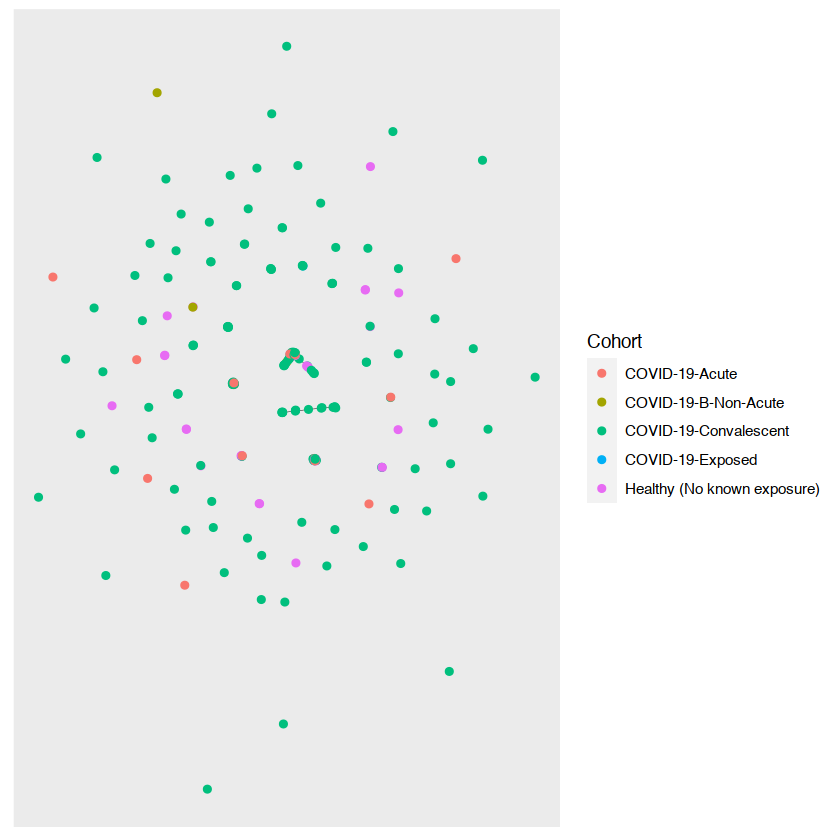

In [130]:
ggraph(bipartite.projection(g)$proj2 , "drl" ) +
geom_edge_link(edge_width = 0.1 ,edge_colour = "#000000") +
geom_node_point(aes(color  = Cohort))

# Covid - adjacency matrix

Make an sample x cluster frequency matrix 

In [139]:
mymat <- matrix(nrow = length(unique(covid$sampleID)), ncol = length(unique(covid$type)),
               dimnames = list(unique(covid$sampleID), unique(covid$type)))

In [140]:
for(s in unique(covid$sampleID)){
    mysample <- covid[ covid$sampleID == s,]
    mytab <- table(mysample$type)
    mymat[s,rownames(mytab)] <- mytab
}

In [142]:
head(mymat)

,global-S%GDT,global-SLG%GNE,global-S%GGE,global-S%RDRGEYNE,global-S%TGDE,global-S%GGYE,global-GE%NTGE,global-G%ENTGE,global-SL%GE,global-S%TGE,⋯,global-RGLAGG%YE,global-SLS%TGE,global-SIGLG%AYE,global-SIGLGLA%E,global-SIGQG%SYE,global-SIGQGL%YE,global-SIGTGI%YE,global-S%GQGFSYE,global-S%GQGISYE,global-SIGTGLG%E
eAM13,1,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
eAM23,NA,NA,1,1,2,1,1,1,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
eAV100,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
eAV105,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
eDH105,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
eDH113,NA,1,NA,NA,NA,NA,NA,NA,NA,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [143]:
# convert NA to 0
mymat[ is.na(mymat)] <- 0

In [144]:
# correlation
mycormat <- cor(t(mymat), method = "spearman")

In [145]:
# convert negative correlation to 0
mycormat[mycormat < 0] <- 0

In [146]:
#graph
g <- graph_from_adjacency_matrix(mycormat, mode = "undirected", weighted = TRUE, diag = FALSE)

In [147]:
head(V(g)$name)

[1] "eAM13"  "eAM23"  "eAV100" "eAV105" "eDH105" "eDH113"

In [148]:
covid_meta <- read.csv(file = "~/Downloads/ImmuneCODE-MIRA-Release002.1/subject-metadata.csv")

In [149]:
V(g)$Cohort <- sapply(V(g)$name, function(x){
    covid_meta$Cohort[match(x, covid_meta$Experiment)]
}
                                    )

In [150]:
head(V(g)$Cohort)

[1] "COVID-19-Convalescent"       "COVID-19-Convalescent"      
[3] "COVID-19-Convalescent"       "COVID-19-Convalescent"      
[5] "COVID-19-Convalescent"       "Healthy (No known exposure)"

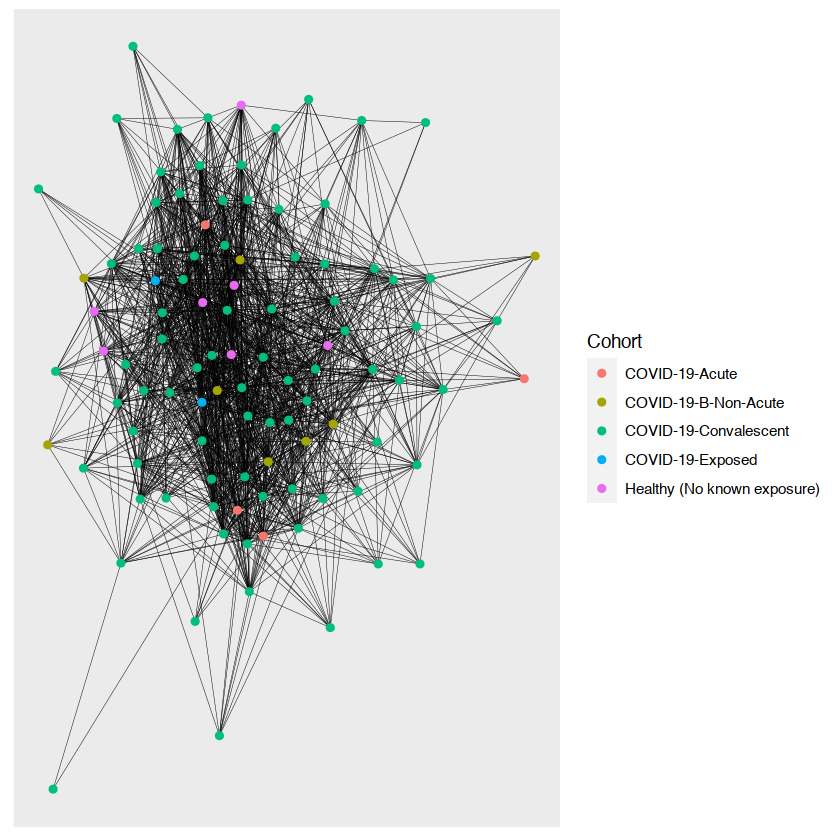

In [152]:
ggraph(g , "fr" ) +
geom_edge_link(edge_width = 0.1 ,edge_colour = "#000000") +
geom_node_point(aes(color  = Cohort))

## community detection

In [194]:
ls()

[1] "colrs"                "covid"                "covid_meta"          
 [4] "datapath"             "dend"                 "g"                   
 [7] "g1"                   "gitpath"              "gliph_all"           
[10] "gliph_rm_na"          "gliph_rm_na_singlerm" "h4hpath"             
[13] "links"                "manifestpath"         "mycormat"            
[16] "mylayout"             "mymat"                "mysample"            
[19] "mytab"                "net"                  "nodes"               
[22] "pbmc_samples"         "plotpath"             "s"

[1] 0.1092342

[1] 0.09387763

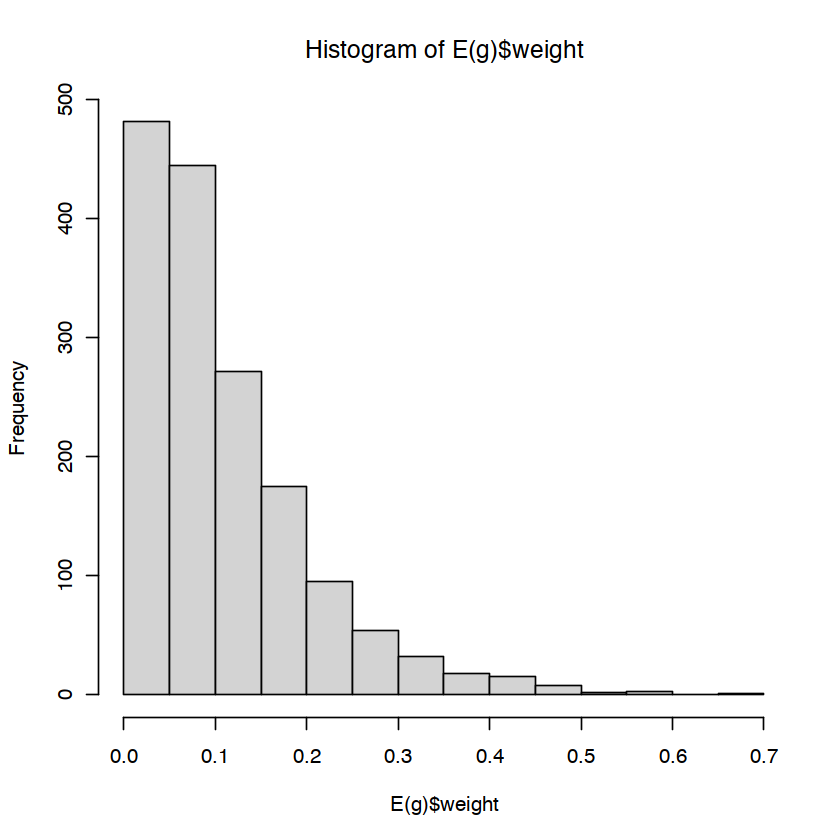

In [198]:
hist(E(g)$weight)

mean(E(g)$weight)

sd(E(g)$weight)

In [153]:
dend <- cluster_edge_betweenness(g)

Warning message in cluster_edge_betweenness(g):
“At core/community/edge_betweenness.c:485 : Membership vector will be selected based on the lowest modularity score.”
Warning message in cluster_edge_betweenness(g):
“At core/community/edge_betweenness.c:492 : Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances.”


In [236]:
colrs <- structure(c("black", "white", "white", "white", "red"),
                   names = c("COVID-19-Acute", "COVID-19-B-Non-Acute", "COVID-19-Convalescent",
                   "COVID-19-Exposed", "Healthy (No known exposure)"))

In [237]:
V(g)$color <- colrs[match(V(g)$Cohort, names(colrs))]

In [242]:
shapes <- structure(c("circle", "none", "none", "none", "circle"),
                   names = c("COVID-19-Acute", "COVID-19-B-Non-Acute", "COVID-19-Convalescent",
                   "COVID-19-Exposed", "Healthy (No known exposure)"))

In [243]:
V(g)$shape <- shapes[match(V(g)$Cohort, names(shapes))]

In [244]:
mylayout <- layout_with_drl(g)
mylayout <- norm_coords(mylayout, ymin=-1, ymax=1, xmin=-1, xmax=1)

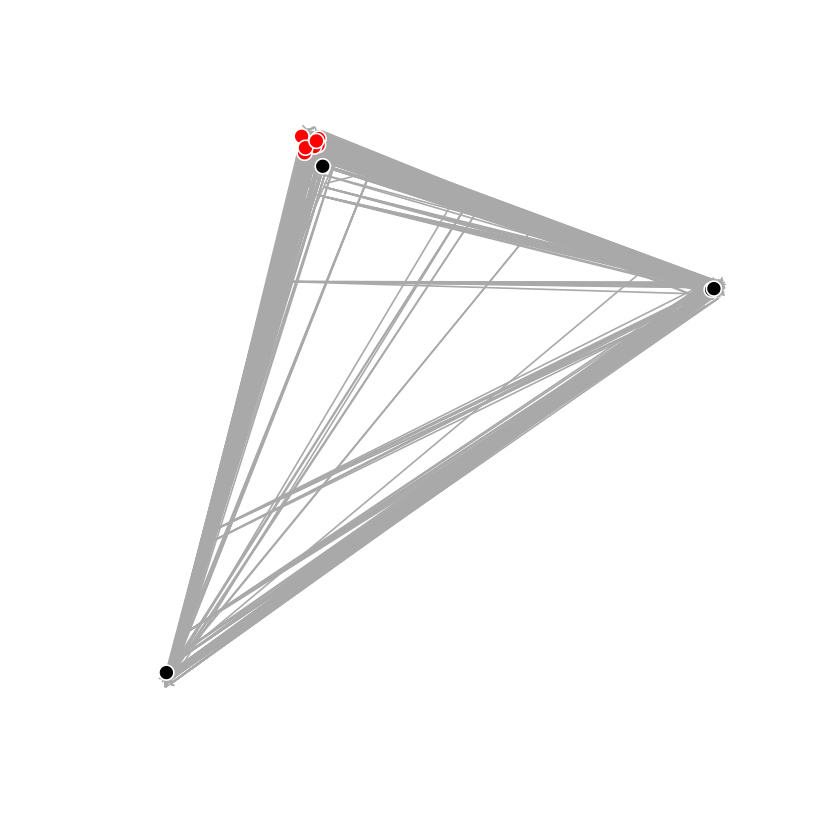

In [245]:
#par(mfrow=c(2,2), mar=c(0,0,0,0))
plot(g, vertex.label=NA, vertex.frame.color="white", vertex.size=5,
     layout = mylayout, rescale = T)

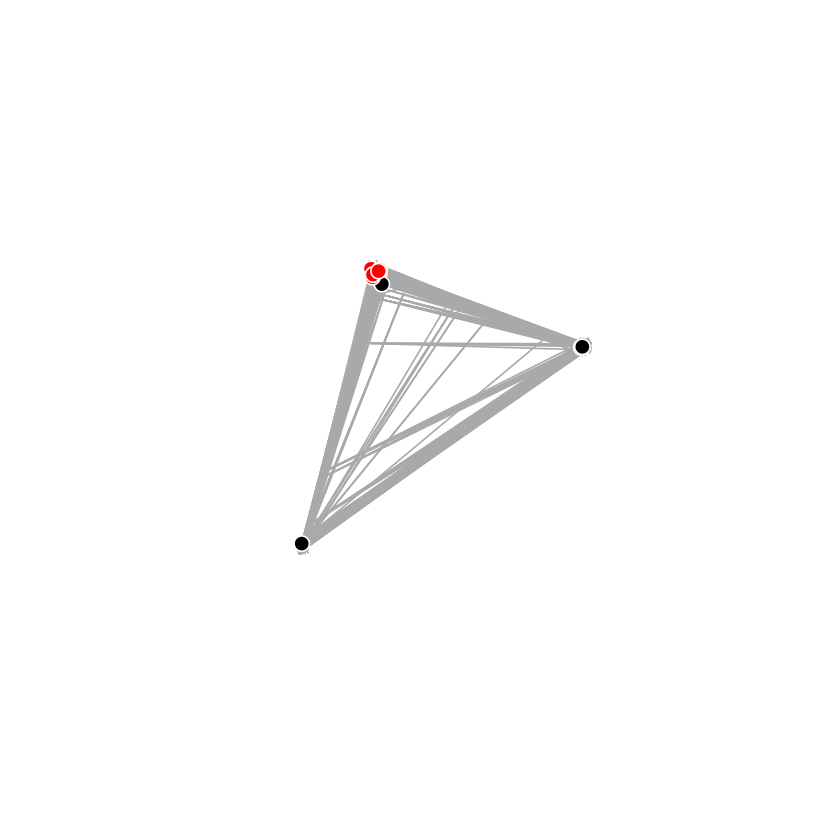

In [253]:
g.sp <- delete_edges(g, E(g)[weight< 0.01])
#mylayout <- layout_with_drl(g.sp)
#mylayout <- norm_coords(mylayout, ymin=-1, ymax=1, xmin=-1, xmax=1)
plot(g.sp, vertex.label=NA, vertex.frame.color="white", vertex.size=5, rescale = F,
     layout = mylayout*0.5)

# Ped - adjacency matrix

In [14]:
load(file = paste0(datapath,"capTCRseq/meta_div_TRB.RData"))

In [19]:
colnames(meta_div)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Naïve"              "SCM"                "TE"                
[16] "EM."                "CM."                "Naïve."            
[19] "SCM."               "TE."                "Naïve.TE"          
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"

In [25]:
head(meta_div)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,Pass,CD3,⋯,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,file,basename,Group,sampletype
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,CHP_10YO_M_00,CHP_10YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,10.591,10.601,0.074,8.556,8.561,0.097,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt,CHP_10YO-M_PBMC_DNA,CHP,PBMC
2,CHP_11YO_M_00,CHP_11YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,11.607,11.614,0.055,10.406,10.414,0.074,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt,CHP_11YO-M_PBMC_DNA,CHP,PBMC
3,CHP_15YO_F_A_00,CHP_15YO_F_A,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,8.982,8.989,0.042,8.560,8.570,0.060,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt,CHP_15YO-F-A_PBMC_DNA,CHP,PBMC
4,CHP_15YO_F_B_00,CHP_15YO_F_B,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,6.330,6.334,0.039,5.870,5.876,0.059,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt,CHP_15YO-F-B_PBMC_DNA,CHP,PBMC
5,CHP_15YO_M_00,CHP_15YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,21.110,21.120,0.040,20.321,20.339,0.079,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt,CHP_15YO-M_PBMC_DNA,CHP,PBMC
6,CHP_16YO_M_00,CHP_16YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,3.972,3.973,0.007,3.944,3.946,0.012,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt,CHP_16YO-M_PBMC_DNA,CHP,PBMC


In [22]:
int <- gliph_rm_na_singlerm[ grepl("CHP", gliph_rm_na_singlerm$file) |
                            grepl("LFS", gliph_rm_na_singlerm$file),]

In [26]:
head(int)

subject:condition,CDR3b,TRBV,TRBJ,CDR3a,count,clonefraction,subject,file,index.x,⋯,vb_score,expansion_score,length_score,cluster_size_score,type,TcRb,V,J,TcRa,Freq
<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>
CHP-328:61085,CAAGQPQHF,TRBV28,TRBJ1-5,NA,858,0.003089977,CHP-328-04-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-04-PBMC-DNA.txt,61085,⋯,0.480,0.110,0.001,0.00083,global-%QP,CAAGQPQHF,TRBV28,TRBJ1-5,NA,858
CHP-328:61085,CAAGQPQHF,TRBV28,TRBJ1-5,NA,858,0.003089977,CHP-328-04-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-04-PBMC-DNA.txt,61085,⋯,0.320,0.048,0.001,0.00230,global-GQ%,CAAGQPQHF,TRBV28,TRBJ1-5,NA,858
CHP-328:61085,CAAGQPQHF,TRBV28,TRBJ1-5,NA,858,0.003089977,CHP-328-04-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-04-PBMC-DNA.txt,61085,⋯,0.190,0.008,0.001,0.00230,global-G%P,CAAGQPQHF,TRBV28,TRBJ1-5,NA,858
CHP-328:61086,CAARGTGNEKLFF,TRBV19,TRBJ1-4,NA,526,0.020440679,CHP-328-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt,61086,⋯,0.180,0.014,0.001,0.00620,global-RG%GNEK,CAARGTGNEKLFF,TRBV19,TRBJ1-4,NA,526
CHP-328:61086,CAARGTGNEKLFF,TRBV19,TRBJ1-4,NA,526,0.020440679,CHP-328-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt,61086,⋯,0.063,0.043,0.001,0.02900,global-RGTG%EK,CAARGTGNEKLFF,TRBV19,TRBJ1-4,NA,526
CHP-328:61086,CAARGTGNEKLFF,TRBV19,TRBJ1-4,NA,526,0.020440679,CHP-328-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt,61086,⋯,0.077,0.035,0.001,0.02900,global-RGT%NEK,CAARGTGNEKLFF,TRBV19,TRBJ1-4,NA,526


match with filenames

In [27]:
meta_div$file <- gsub(".*CLONES_", "CLONES_", meta_div$file)

In [28]:
int$file <- gsub(".*CLONES_", "CLONES_", int$file)

In [33]:
gliph_meta_int <- merge(meta_div, int ,by = "file", all = F)

In [40]:
dim(gliph_meta_int)

[1] 89990    84

In [41]:
#some filtering
gliph_meta_int <- gliph_meta_int[ gliph_meta_int$number_subject > 1,]
dim(gliph_meta_int)

# number of cdr3
gliph_meta_int <- gliph_meta_int[ gliph_meta_int$number_unique_cdr3 > 5,]

dim(gliph_meta_int)

# fisher threshold
gliph_meta_int <- gliph_meta_int[ gliph_meta_int$Fisher_score < 0.0001,]

[1] 87701    84

[1] 21124    84

In [42]:
dim(gliph_meta_int)

[1] 1920   84

In [430]:
mymat <- matrix(nrow = length(unique(gliph_meta_int$basename)), ncol = length(unique(gliph_meta_int$type)),
               dimnames = list(unique(gliph_meta_int$basename), unique(gliph_meta_int$type)))

In [431]:
for(s in unique(gliph_meta_int$basename)){
    mysample <- gliph_meta_int[ gliph_meta_int$basename == s,]
    mytab <- table(mysample$type)
    mymat[s,rownames(mytab)] <- mytab
}

In [433]:
mymat[1:10,1:10]

,motif-EGEW,global-SLG%E,global-SPG%G,global-SLGG%E,global-S%GDT,global-S%GGTE,global-S%SGEK,global-S%GTE,global-S%SYE,global-SLAGA%E
CHP_10YO-M_PBMC_DNA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA
CHP_323-03_cfDNA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA
CHP_323-04-PBMC-DNA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA
CHP_323-05-PBMC-DNA,NA,1,NA,1,1,1,1,1,1,NA
CHP_324-05_PBMC-DNA,NA,NA,NA,NA,NA,1,NA,NA,NA,1
CHP_326-05_cfDNA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CHP_331-04-PBMC-DNA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA
CHP_331-05-PBMC-DNA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA
CHP_334-02_cfDNA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CHP_335-03-PBMC-DNA,NA,NA,NA,NA,NA,NA,NA,1,1,NA


In [434]:
dim(mymat)

[1] 265 257

In [438]:
summary(colSums(is.na(mymat)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  218.0   258.0   262.0   259.6   264.0   264.0 

In [439]:
# keep clusters in at least two samples
mymat <- mymat[,colSums(is.na(mymat)) <= 263]

In [440]:
dim(mymat)

[1] 265 184

In [441]:
summary(rowSums(is.na(mymat)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    149     177     181     179     183     184 

In [442]:
#keep samples with at least two clusters
mymat <- mymat[rowSums(is.na(mymat)) <= 182,]

In [443]:
dim(mymat)

[1] 195 184

In [444]:
# convert NA to 0
mymat[ is.na(mymat)] <- 0

In [525]:
# correlation
mycormat <- cor(t(mymat), method = "spearman")

In [526]:
head(mycormat)

,CHP_323-05-PBMC-DNA,CHP_324-05_PBMC-DNA,CHP_335-03-PBMC-DNA,CHP_336-05_PBMC-DNA,CHP_337-03_cfDNA,CHP_337-03_PBMC-DNA,CHP_338-03-PBMC-DNA,CHP_338-05-PBMC-DNA,CHP_339-03-PBMC-DNA,CHP_339-04_cfDNA,⋯,CHP-411-02-PBMC-DNA,CHP-416-02-PBMC-DNA,LFS_TCR-4535-PBMC-DNA,LFS_TCR-4570-PBMC-DNA,LFS_TCR-4758-PBMC-DNA,LFS_TCR-4759-PBMC-DNA,LFS_TCR-4837-PBMC-DNA,LFS_TCR-4838-PBMC-DNA,LFS_TCR-5014-PBMC-DNA,LFS_TCR-5067-PBMC-DNA
CHP_323-05-PBMC-DNA,1.00000000,0.12344317,0.28339770,-0.03650857,0.19872479,0.19749968,-0.04509876,-0.05013805,-0.02084691,-0.02084660,⋯,0.12212208,0.25314105,-0.02964532,0.16516678,0.19872479,-0.04509876,-0.03954802,-0.02084691,-0.02560258,0.35997888
CHP_324-05_PBMC-DNA,0.12344317,1.00000000,-0.03370787,-0.03370529,-0.02363671,-0.02363600,-0.04163589,-0.04628824,-0.01924620,-0.01924591,⋯,0.13208166,0.27586216,-0.02736903,-0.02736903,-0.02363671,-0.04163589,-0.03651136,-0.01924620,-0.02363671,-0.02736903
CHP_335-03-PBMC-DNA,0.28339770,-0.03370787,1.00000000,-0.03370529,-0.02363671,-0.02363600,0.10023455,0.08205643,-0.01924620,-0.01924591,⋯,0.25870541,-0.01924620,-0.02736903,0.18246018,0.21798296,0.10023455,0.12344317,-0.01924620,-0.02363671,0.18246018
CHP_336-05_PBMC-DNA,-0.03650857,-0.03370529,-0.03370529,1.00000000,-0.02363490,-0.02363419,-0.04163271,-0.04628471,-0.01924473,-0.01924444,⋯,0.03440007,-0.01924473,-0.02736694,-0.02736694,-0.02363490,0.24054456,-0.03650857,-0.01924473,-0.02363490,-0.02736694
CHP_337-03_cfDNA,0.19872479,-0.02363671,-0.02363671,-0.02363490,1.00000000,0.32595706,-0.02919601,0.14753795,-0.01349586,-0.01349566,⋯,0.09261861,-0.01349586,-0.01919177,-0.01919177,-0.01657459,-0.02919601,-0.02560258,-0.01349586,-0.01657459,0.27508207
CHP_337-03_PBMC-DNA,0.19749968,-0.02363600,-0.02363600,-0.02363419,0.32595706,1.00000000,-0.02919514,-0.03245737,-0.01349546,-0.01349526,⋯,-0.04362894,-0.01349546,-0.01919120,-0.01919120,-0.01657409,-0.02919514,-0.02560181,-0.01349546,-0.01657409,-0.01919120


In [527]:
summary(as.vector(mycormat))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.14114 -0.02890 -0.01919  0.03126  0.04949  1.00000 

### heatmap

In [561]:
# convert negative correlation to 0
mycormat[mycormat < 0] <- 0

In [562]:
library(ComplexHeatmap)

In [563]:
makematrix_4hm <- function(df, var, name ){
    mymat <- df[[var]]
names(mymat) <- df[["basename"]]
mymat <- t(as.matrix(mymat))
rownames(mymat) <- name
    
    return(mymat)
}

In [564]:
meta_div_orignal <- meta_div

In [565]:
meta_div <- meta_div[ !is.na(meta_div$basename),]

In [566]:
rownames(meta_div) <- (meta_div$basename)

In [567]:
head(mycormat)

,CHP_323-05-PBMC-DNA,CHP_324-05_PBMC-DNA,CHP_335-03-PBMC-DNA,CHP_336-05_PBMC-DNA,CHP_337-03_cfDNA,CHP_337-03_PBMC-DNA,CHP_338-03-PBMC-DNA,CHP_338-05-PBMC-DNA,CHP_339-03-PBMC-DNA,CHP_339-04_cfDNA,⋯,CHP-411-02-PBMC-DNA,CHP-416-02-PBMC-DNA,LFS_TCR-4535-PBMC-DNA,LFS_TCR-4570-PBMC-DNA,LFS_TCR-4758-PBMC-DNA,LFS_TCR-4759-PBMC-DNA,LFS_TCR-4837-PBMC-DNA,LFS_TCR-4838-PBMC-DNA,LFS_TCR-5014-PBMC-DNA,LFS_TCR-5067-PBMC-DNA
CHP_323-05-PBMC-DNA,1.0000000,0.1234432,0.2833977,0,0.1987248,0.1974997,0.0000000,0.00000000,0,0,⋯,0.12212208,0.2531410,0,0.1651668,0.1987248,0.0000000,0.0000000,0,0,0.3599789
CHP_324-05_PBMC-DNA,0.1234432,1.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.00000000,0,0,⋯,0.13208166,0.2758622,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0.0000000
CHP_335-03-PBMC-DNA,0.2833977,0.0000000,1.0000000,0,0.0000000,0.0000000,0.1002346,0.08205643,0,0,⋯,0.25870541,0.0000000,0,0.1824602,0.2179830,0.1002346,0.1234432,0,0,0.1824602
CHP_336-05_PBMC-DNA,0.0000000,0.0000000,0.0000000,1,0.0000000,0.0000000,0.0000000,0.00000000,0,0,⋯,0.03440007,0.0000000,0,0.0000000,0.0000000,0.2405446,0.0000000,0,0,0.0000000
CHP_337-03_cfDNA,0.1987248,0.0000000,0.0000000,0,1.0000000,0.3259571,0.0000000,0.14753795,0,0,⋯,0.09261861,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0.2750821
CHP_337-03_PBMC-DNA,0.1974997,0.0000000,0.0000000,0,0.3259571,1.0000000,0.0000000,0.00000000,0,0,⋯,0.00000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0.0000000


In [568]:
meta_div <- meta_div[colnames(mycormat),]

In [569]:
dim(meta_div)

[1] 195  58

In [570]:
mycohort <- makematrix_4hm(meta_div, "Disease_type", "Cohort")
mycycle <- makematrix_4hm(meta_div, "cycle", "Cycle")
mysample <- makematrix_4hm(meta_div, "sampletype", "Sample type")
mygroup <- makematrix_4hm(meta_div, "cancergroup", "Cancer type")

In [571]:
mycycle

,CHP_323-05-PBMC-DNA,CHP_324-05_PBMC-DNA,CHP_335-03-PBMC-DNA,CHP_336-05_PBMC-DNA,CHP_337-03_cfDNA,CHP_337-03_PBMC-DNA,CHP_338-03-PBMC-DNA,CHP_338-05-PBMC-DNA,CHP_339-03-PBMC-DNA,CHP_339-04_cfDNA,⋯,CHP-411-02-PBMC-DNA,CHP-416-02-PBMC-DNA,LFS_TCR-4535-PBMC-DNA,LFS_TCR-4570-PBMC-DNA,LFS_TCR-4758-PBMC-DNA,LFS_TCR-4759-PBMC-DNA,LFS_TCR-4837-PBMC-DNA,LFS_TCR-4838-PBMC-DNA,LFS_TCR-5014-PBMC-DNA,LFS_TCR-5067-PBMC-DNA
Cycle,X05,X05,X03,X05,X03,X03,X03,X05,X03,X04,⋯,X02,X02,X00,X00,X00,X00,X00,X00,X00,X00


In [572]:
#names(cycle_col) <- paste("X", names(cycle_col), sep = "")

In [573]:
group_col

Normal       LFS    Normal       LFS    Normal       LFS    Normal       LFS 
"#bec2be"   "black" "#bec2be"   "black" "#bec2be"   "black" "#bec2be"   "black" 
 Leukemia  Lymphoma     Solid 
"#1B9E77" "#D95F02" "#7570B3"

In [574]:
cycle_col

X00       X00       X00       X00                 X01       X02       X03 
"#bec2be" "#bec2be" "#bec2be" "#bec2be" "#bec2be" "#1f78b4" "#a6cee3" "#b2df8a" 
      X04       X05 
"#33a02c" "#e31a1c"

In [575]:
cycle_col <- c("#bec2be", cycle_col)
names(cycle_col)[1] <- "X00"

In [576]:
group_col <- c("#bec2be","black", group_col)
names(group_col)[1] <- "Normal"
names(group_col)[2] <- "LFS"

In [577]:
group_col

Normal       LFS    Normal       LFS    Normal       LFS    Normal       LFS 
"#bec2be"   "black" "#bec2be"   "black" "#bec2be"   "black" "#bec2be"   "black" 
   Normal       LFS  Leukemia  Lymphoma     Solid 
"#bec2be"   "black" "#1B9E77" "#D95F02" "#7570B3"

In [578]:
cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))

cycle_hm <- Heatmap(mycycle, col = cycle_col, , height = unit(1,"cm"))

sample_hm <- Heatmap(mysample, col = type_col, , height = unit(1,"cm"))

group_hm <- Heatmap(mygroup, col = group_col, , height = unit(1,"cm"))

In [579]:
mypts <- makematrix_4hm(meta_div, "Patient", "Patient")

In [580]:
pts_hm <- Heatmap(mypts,  height = unit(1,"cm"), show_heatmap_legend = FALSE, show_column_names = FALSE)

In [581]:
mypts

,CHP_323-05-PBMC-DNA,CHP_324-05_PBMC-DNA,CHP_335-03-PBMC-DNA,CHP_336-05_PBMC-DNA,CHP_337-03_cfDNA,CHP_337-03_PBMC-DNA,CHP_338-03-PBMC-DNA,CHP_338-05-PBMC-DNA,CHP_339-03-PBMC-DNA,CHP_339-04_cfDNA,⋯,CHP-411-02-PBMC-DNA,CHP-416-02-PBMC-DNA,LFS_TCR-4535-PBMC-DNA,LFS_TCR-4570-PBMC-DNA,LFS_TCR-4758-PBMC-DNA,LFS_TCR-4759-PBMC-DNA,LFS_TCR-4837-PBMC-DNA,LFS_TCR-4838-PBMC-DNA,LFS_TCR-5014-PBMC-DNA,LFS_TCR-5067-PBMC-DNA
Patient,CHP_323,CHP_324,CHP_335,CHP_336,CHP_337,CHP_337,CHP_338,CHP_338,CHP_339,CHP_339,⋯,CHP_411,CHP_416,LFS_TCR_4535,LFS_TCR_4570,LFS_TCR_4758,LFS_TCR_4759,LFS_TCR_4837,LFS_TCR_4838,LFS_TCR_5014,LFS_TCR_5067


In [582]:
hm <- Heatmap(mycormat, show_row_names = TRUE, row_names_gp = gpar(fontsize = 3))

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.



In [583]:
pdf(paste0(plotpath, "heatmap_clusters_int_LFS.pdf"), width = 10, height = 10)
hm %v% cohort_hm %v% cycle_hm %v% sample_hm %v% group_hm %v% pts_hm
dev.off()

pdf 
  2

In [551]:
length(colnames(mygroup))

[1] 195

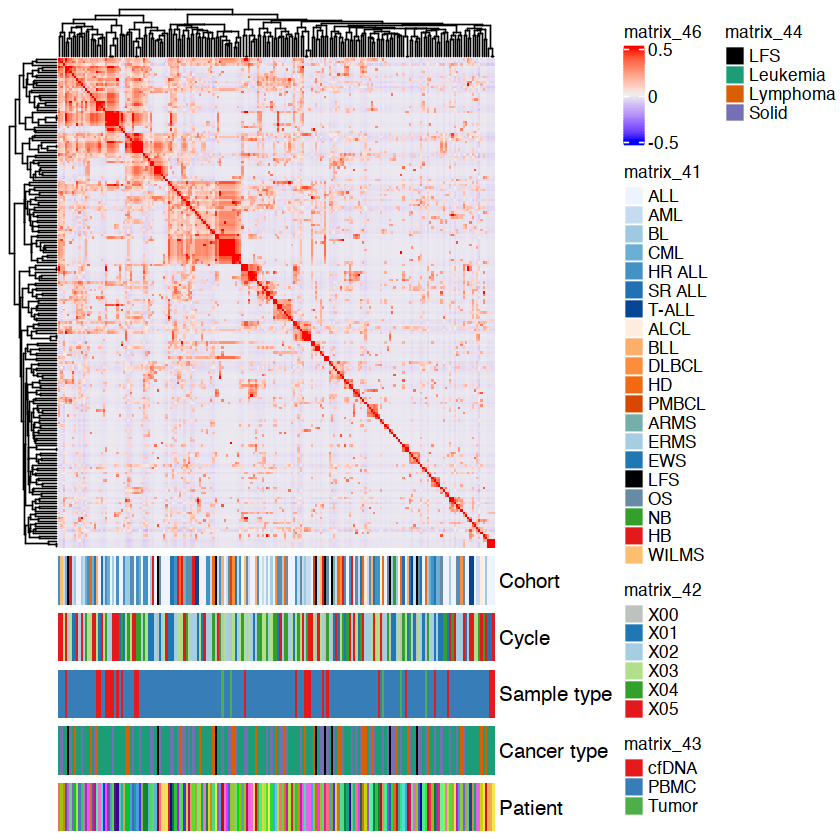

In [552]:
hm %v% cohort_hm %v% cycle_hm %v% sample_hm %v% group_hm %v% pts_hm

### Graph

In [278]:
# convert negative correlation to 0
mycormat[mycormat < 0] <- 0

In [291]:
summary(as.vector(mycormat))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.05179 0.06836 1.00000 

In [279]:
#graph
g <- graph_from_adjacency_matrix(mycormat, mode = "undirected", weighted = TRUE, diag = FALSE)

In [280]:
V(g)$Disease_type <- sapply(V(g)$name, function(x){
    gliph_meta_int$Disease_type[match(x, gliph_meta_int$sample_id)]
}
                                    )

In [281]:
V(g)$Age <- sapply(V(g)$name, function(x){
    gliph_meta_int$Age[match(x, gliph_meta_int$sample_id)]
}
                                    )

In [282]:
V(g)$Cycle <- sapply(V(g)$name, function(x){
    gliph_meta_int$cycle[match(x, gliph_meta_int$sample_id)]
}
                                    )

In [283]:
V(g)$cancergroup <- sapply(V(g)$name, function(x){
    gliph_meta_int$cancergroup[match(x, gliph_meta_int$sample_id)]
}
                                    )

In [284]:
V(g)$sampletype <- sapply(V(g)$name, function(x){
    gliph_meta_int$sampletype[match(x, gliph_meta_int$sample_id)]
}
                                    )

In [343]:
V(g)$Patient <- sapply(V(g)$name, function(x){
    gliph_meta_int$Patient[match(x, gliph_meta_int$sample_id)]
}
                                    )

[1] 0.1549289

[1] 0.1019652

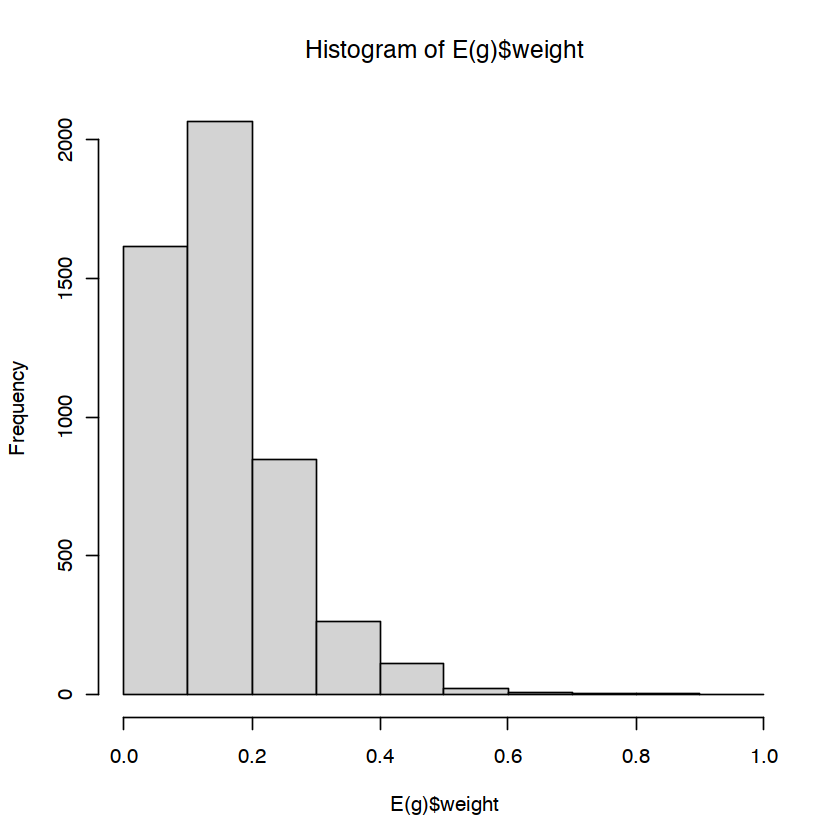

In [285]:
hist(E(g)$weight)
mean(E(g)$weight)
sd(E(g)$weight)

In [286]:
#mylayout <- layout_with_drl(g)
#mylayout <- norm_coords(mylayout, ymin=-1, ymax=1, xmin=-1, xmax=1)

In [335]:
#names(cycle_col) <- paste("X", names(cycle_col), sep = "")

In [345]:
table(V(g)$cancergroup)


Leukemia      LFS Lymphoma    Solid 
     100        8       24       50 

In [347]:
group_col <- c(group_col, "black")

In [352]:
names(group_col)[4] <- "LFS"

In [353]:
group_col

Leukemia  Lymphoma     Solid       LFS 
"#1B9E77" "#D95F02" "#7570B3"   "black"

In [289]:
type_col <- structure(c("#e41a1c", "#377eb8", "#4daf4a"),
                   names = c("cfDNA", "PBMC", "Tumor"))

In [310]:
E(g)$width <- 10*E(g)$weight

In [354]:
V(g)$color <- group_col[match(V(g)$cancergroup, names(group_col))]

In [297]:
#V(g)$shape <- shapes[match(V(g)$Cohort, names(shapes))]

In [320]:
mylayout <- layout_with_drl(g)
mylayout <- norm_coords(mylayout, ymin=-1, ymax=1, xmin=-1, xmax=1)

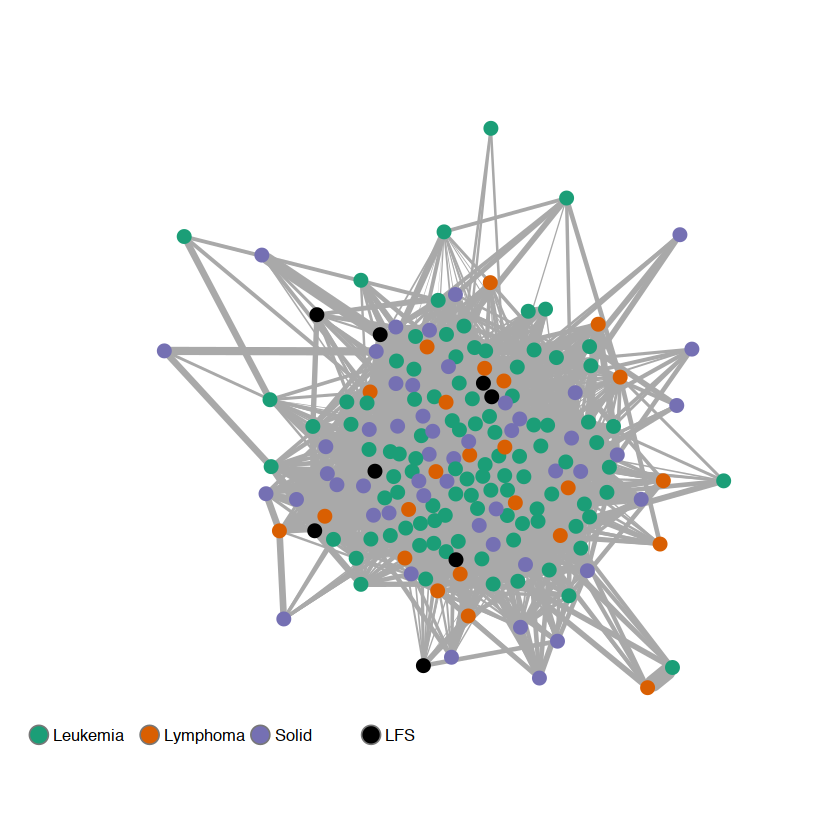

In [355]:
#par(mfrow=c(2,2), mar=c(0,0,0,0))
plot(g, vertex.label=NA, vertex.frame.color="transparent", vertex.size=5)
legend(x=-1.5, y=-1.1, names(group_col), pch=21,
       col="#777777", pt.bg=group_col, pt.cex=2, cex=.8, bty="n", ncol=4)

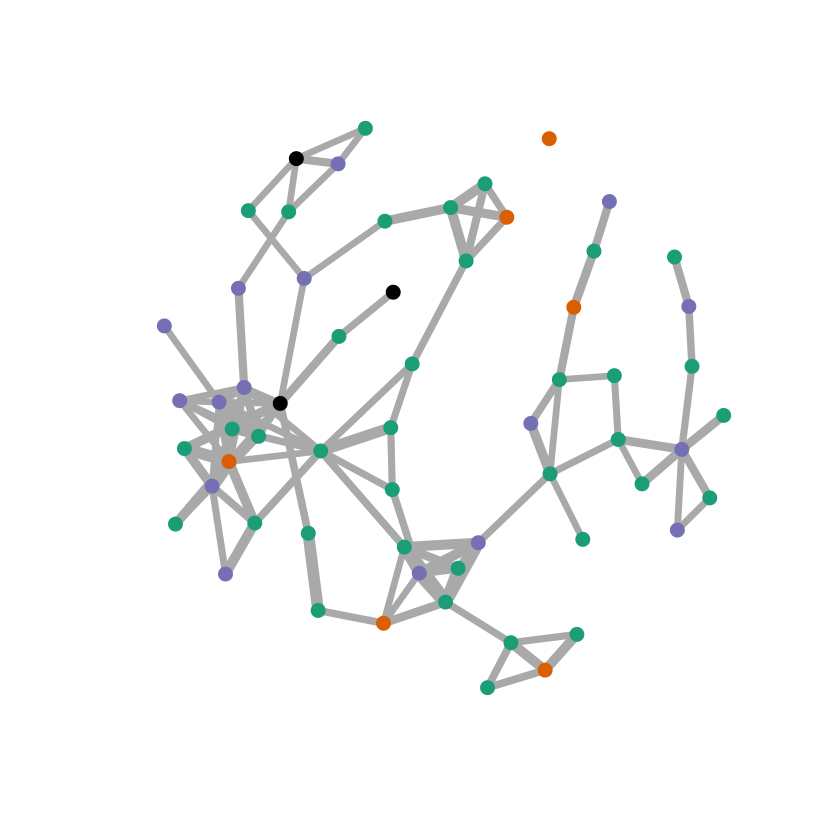

In [371]:
g.sp <- delete_edges(g, E(g)[weight< 0.4])
g.sp <- delete_vertices(g.sp, V(g.sp)[degree(g.sp) <= 1])

#mylayout <- layout_with_drl(g.sp)
#mylayout <- norm_coords(mylayout, ymin=-1, ymax=1, xmin=-1, xmax=1)
plot(g.sp, vertex.label=NA, vertex.frame.color="transparent", vertex.size=5)

In [360]:
dend <- cluster_edge_betweenness(g.sp)

Warning message in cluster_edge_betweenness(g.sp):
“At core/community/edge_betweenness.c:485 : Membership vector will be selected based on the lowest modularity score.”
Warning message in cluster_edge_betweenness(g.sp):
“At core/community/edge_betweenness.c:492 : Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances.”


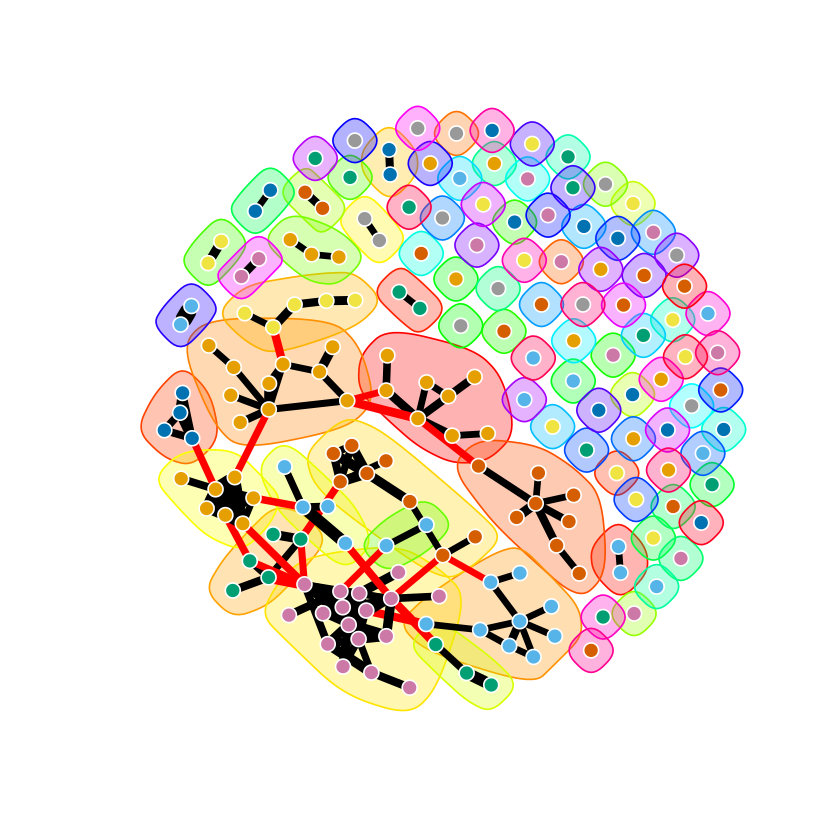

In [361]:
plot(dend, g.sp, vertex.label=NA, vertex.frame.color="white", vertex.size=5)